100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


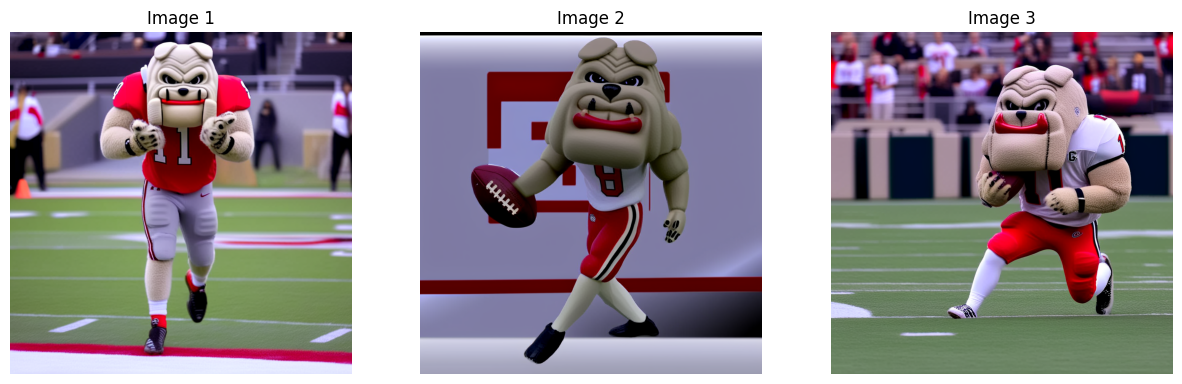

In [25]:
generate_images("Hairy Dawg is playing football in stadium")

100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


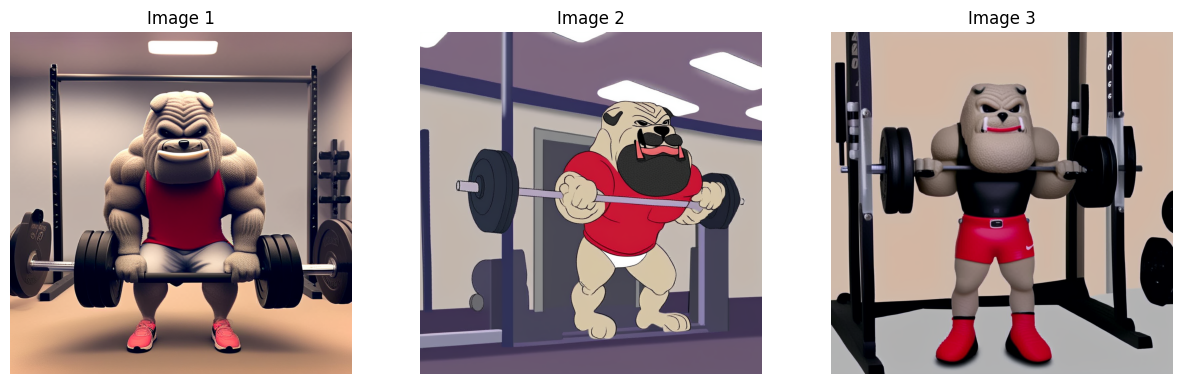

In [4]:
generate_images("Hairy Dawg is lifting weights at the gym")

In [1]:
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusionXLPipeline
from datetime import datetime
import os

def generate_images(prompt, num_images=3, guidance_scale=7.5, output_dir="./dataset/output/"):
    """
    Generate, display, and save images using Stable Diffusion XL with LoRA weights.

    Args:
        prompt (str): The text prompt to generate images.
        num_images (int): Number of images to generate (default: 3).
        guidance_scale (float): Scale for classifier-free guidance (default: 7.5).
        output_dir (str): Directory to save the images (default: "./dataset/output/").
    """
    # Load base SDXL model
    base_model = "./stable-diffusion-xl-base-1.0/"
    pipe = StableDiffusionXLPipeline.from_pretrained(
        base_model,
        torch_dtype=torch.float16, 
        low_cpu_mem_usage=True,
        use_safetensors=True
    ).to("cuda")

    # Load LoRA weights
    lora_path = "./stable-diffusion-xl-base-1.0/dataset/dreambooth_output_2000/pytorch_lora_weights.safetensors"
    pipe.load_lora_weights(lora_path)

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Create a subplot grid for visualization
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        image = pipe(prompt, guidance_scale=guidance_scale).images[0]  # Generate an image
        
        # Generate a unique filename using timestamp
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S_%f")  # Unique identifier
        output_path = os.path.join(output_dir, f"generated_{timestamp}.jpg")
        
        # Save the image
        image.save(output_path)

        # Display image in Jupyter Notebook
        axes[i].imshow(image)
        axes[i].axis("off")  # Hide axis
        axes[i].set_title(f"Image {i+1}")


    plt.show()  # Show all images in a single row


/home/mk47369/env/torch26/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
